In [1]:
H0km = 70
OmegaL = 0.7
OmegaM = 0.3
OmegaK = 1 - OmegaL - OmegaM


In [2]:
import math
data = []

H0 = H0km / 3.08e19 * 60 * 60 * 24 * 365 * 1e6
H = H0
c = 1
z = 0
t = 0
x1 = 0.1
x2 = 0

while z < 10:
    t -= 1
    x1 += c - H * x1
    x2 += c - H * x2
    z = 0.1 / (x1 - x2) - 1
    H = H0 * (OmegaM * (1+z)**3 + OmegaL + OmegaK * (1+z)**2)**0.5

    xx = abs(OmegaK)**0.5 * x2 * (1+z)
    if OmegaK == 0:
        x = x2
    elif OmegaK < 0:
        x = 1/H0 * math.sin(xx * H0) / xx * x2 
    else:
        x = 1/H0 * math.sinh(xx * H0) / xx * x2 

    
    data.append([z, -t, x, x2 * (1 + z)])


In [3]:
import cosmolopy.distance as cd
cosmo = {'omega_M_0' : OmegaM, 'omega_lambda_0' : OmegaL, 'h' : H0km/100}
cosmo = cd.set_omega_k_0(cosmo)

data2 = []

z = 0
pc2ly = 3.261564
while z < 10:
    d_C = cd.comoving_distance(z, **cosmo)  * pc2ly
    d_A = cd.angular_diameter_distance(z, **cosmo)  * pc2ly
    d_T = cd.lookback_time(z, **cosmo) / 60 / 60 / 24 / 365 / 1e6
    
    data2.append([z, d_T, d_A, d_C])
    
    z += 0.1

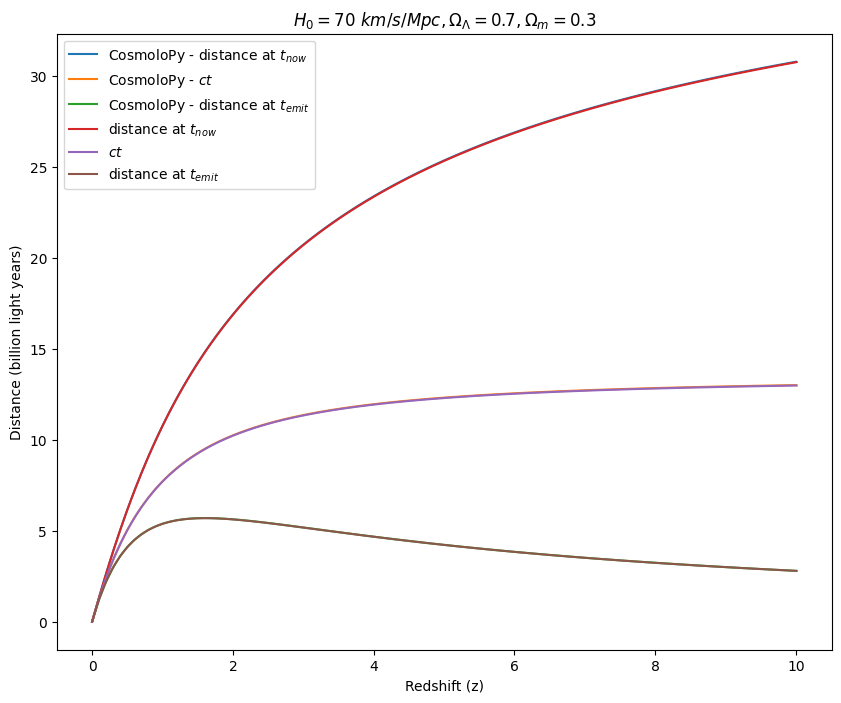

In [4]:
import matplotlib.pyplot as plt

dataz = []
dataC = []
dataA = []
dataT = []

dataz2 = []
dataA2 = []
dataC2 = []
dataT2 = []

for i in range(len(data)):
    dataz.append(data[i][0])
    dataT.append(data[i][1] / 1000)
    dataA.append(data[i][2] / 1000)
    dataC.append(data[i][3] / 1000)

for i in range(len(data2)):
    dataz2.append(data2[i][0])
    dataT2.append(data2[i][1] / 1000)
    dataA2.append(data2[i][2] / 1000)
    dataC2.append(data2[i][3] / 1000)


plt.figure(figsize=(10,8))
    
plt.plot(dataz2, dataC2, label = "CosmoloPy - distance at $t_{now}$")
plt.plot(dataz2, dataT2, label = "CosmoloPy - $ct$")
plt.plot(dataz2, dataA2, label = "CosmoloPy - distance at $t_{emit}$")

plt.plot(dataz, dataC, label = "distance at $t_{now}$")
plt.plot(dataz, dataT, label = "$ct$")
plt.plot(dataz, dataA, label = "distance at $t_{emit}$")


plt.title("$H_0 = 70~km/s/Mpc, \Omega_\Lambda =" + str(OmegaL) + ", \Omega_m = " + str(OmegaM) + "$")
plt.xlabel("Redshift (z)")
plt.ylabel("Distance (billion light years)")
plt.legend()

plt.savefig('cp4.png',  bbox_inches='tight')
plt.show()